In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

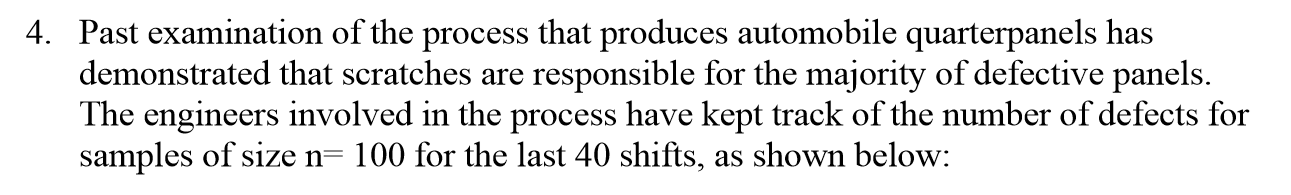

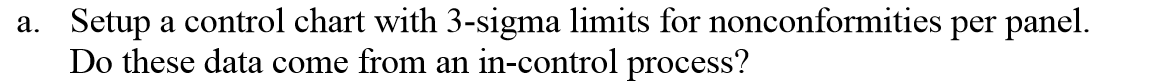

In [6]:
df = pd.read_csv("CC for Attributes P4.csv",header=0)
df.head()

,sample_index,number_of_defects
0,1,3
1,2,12
2,3,4
3,4,9
4,5,6


In [7]:
m = df.shape[0]
n = 100 #from problem

In [8]:
df["U_i"] = df.number_of_defects/n
df.head()

,sample_index,number_of_defects,U_i
0,1,3,0.03
1,2,12,0.12
2,3,4,0.04
3,4,9,0.09
4,5,6,0.06


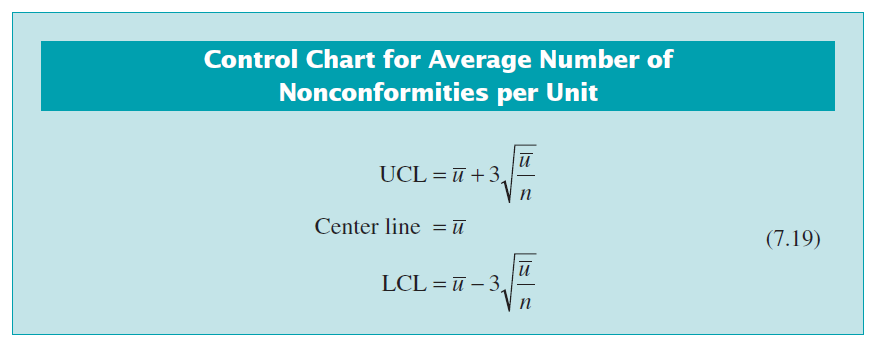

In [9]:
u = df.U_i
u_bar = u.mean()
print(u_bar)

0.07100000000000002


In [10]:
UCL_u = u_bar + 3*math.sqrt(u_bar/n)
CL_u = u_bar
LCL_u = u_bar - 3*math.sqrt(u_bar/n)
print("UCL_u: ",UCL_u,'\n',"CL_u: ",CL_u,'\n',"LCL_u: ",LCL_u)

UCL_u:  0.1509374755668454 
 CL_u:  0.07100000000000002 
 LCL_u:  -0.008937475566845363


In [11]:
if LCL_u < 0:
    LCL_u = 0
print("UCL_u: ",UCL_u,'\n',"CL_u: ",CL_u,'\n',"LCL_u: ",LCL_u)

UCL_u:  0.1509374755668454 
 CL_u:  0.07100000000000002 
 LCL_u:  0


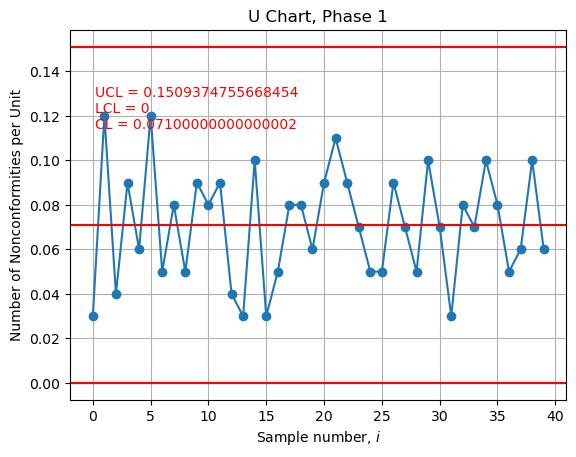

In [12]:
ax = plt.figure().gca()
ax.plot(u.index,u,marker="o")
ax.axhline(y = UCL_u, color = 'r', linestyle = '-')
ax.axhline(y = LCL_u, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_u, LCL_u, CL_u),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_u, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('U Chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('Number of Nonconformities per Unit')

plt.show()

In [13]:
print("u_bar: " , CL_u)

u_bar:  0.07100000000000002


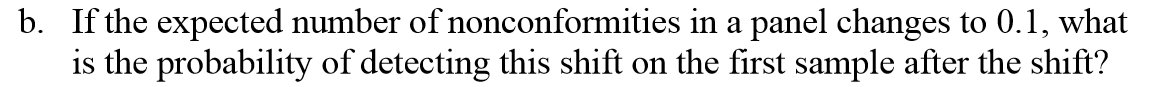

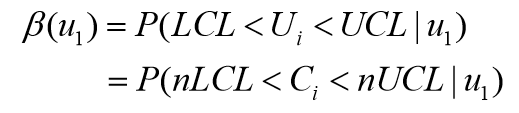

In [14]:
u_shift = 0.1

p = u_shift
k2 = math.ceil(n*UCL_u)
k1 = math.ceil(n*LCL_u)
print(k2)
print(k1)
beta_binom = stats.binom.cdf(k2-1,n,p) - stats.binom.cdf(k1,n,p)

mu = n*u_shift
beta_poisson = stats.poisson.cdf(k2-1,mu) - stats.poisson.cdf(k1,mu)

print("beta from binomial: ", beta_binom ,'\n')
print("beta from poisson assumption: ", beta_poisson , '\n')

P_shift_detect_binom = 1 - beta_binom
P_shift_detect_poisson = 1 - beta_poisson

print("Probability to detect shift from binom: ", P_shift_detect_binom , '\n')
print("Probability to detect shift from poisson assumption: ", P_shift_detect_poisson)


16
0
beta from binomial:  0.9600829114900289 

beta from poisson assumption:  0.9512141967662588 

Probability to detect shift from binom:  0.03991708850997111 

Probability to detect shift from poisson assumption:  0.048785803233741154


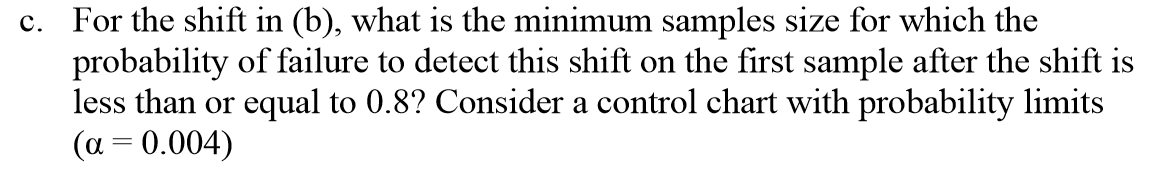

In [304]:
#binomial
n = 99
alpha = 0.004
beta_binom = 1;

while beta_binom > 0.8:
    n = n+1
    print("n = " , n)

    LCL_u = u_bar - 3*math.sqrt(u_bar/n)
    print("LCL_u: " ,LCL_u)

    if LCL_u < 0:
        k1 = 0
        k2 = stats.binom.ppf(1-alpha,n,u_bar)
        print("n*LCL: ",k1,"n*UCL: ", k2)
        beta_binom = stats.binom.cdf(k2-1,n,p) - stats.binom.cdf(k1,n,p)

    else:
        k1 = stats.binom.ppf(alpha/2,n,u_bar)
        k2 = stats.binom.ppf(1-alpha/2,n,u_bar)
        print("n*LCL: ",k1,"n*UCL: ", k2)
        beta_binom = stats.binom.cdf(k2-1,n,p) - stats.binom.cdf(k1,n,p)

    print("beta: ", beta_binom, "\n")


        
    

n =  100
LCL_u:  -0.008937475566845376
n*LCL:  0 n*UCL:  15.0
beta:  0.9274004733362322 

n =  101
LCL_u:  -0.008540761080513479
n*LCL:  0 n*UCL:  15.0
beta:  0.9222727467426755 

n =  102
LCL_u:  -0.008149895024269882
n*LCL:  0 n*UCL:  15.0
beta:  0.9169147718608724 

n =  103
LCL_u:  -0.007764735098555575
n*LCL:  0 n*UCL:  15.0
beta:  0.9113250876020561 

n =  104
LCL_u:  -0.007385143804363656
n*LCL:  0 n*UCL:  15.0
beta:  0.9055027186205284 

n =  105
LCL_u:  -0.00701098823700598
n*LCL:  0 n*UCL:  15.0
beta:  0.8994471837941025 

n =  106
LCL_u:  -0.006642139890606136
n*LCL:  0 n*UCL:  15.0
beta:  0.8931585024860372 

n =  107
LCL_u:  -0.006278474472665607
n*LCL:  0 n*UCL:  15.0
beta:  0.8866371985845997 

n =  108
LCL_u:  -0.005919871728095508
n*LCL:  0 n*UCL:  16.0
beta:  0.9285143024094261 

n =  109
LCL_u:  -0.0055662152721480535
n*LCL:  0 n*UCL:  16.0
beta:  0.9236524457826546 

n =  110
LCL_u:  -0.0052173924317206605
n*LCL:  0 n*UCL:  16.0
beta:  0.9185783652429574 

n =  111
